In [0]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

returns:
 [[1 2]
 [2 4]
 [3 6]]
mu_values:  [2. 4.]
covariance matrix:
 [[1. 2.]
 [2. 4.]]

weights:  [1 0]
expected_return based on captial allocation w:  2.0
expected_portfolio_variance  1.0
volatility 1.0

weights:  [0.75 0.25]
expected_return based on captial allocation w:  2.5
expected_portfolio_variance  1.5625
volatility 1.25

weights:  [0.5 0.5]
expected_return based on captial allocation w:  3.0
expected_portfolio_variance  2.25
volatility 1.5

weights:  [0.25 0.75]
expected_return based on captial allocation w:  3.5
expected_portfolio_variance  3.0625
volatility 1.75

weights:  [0 1]
expected_return based on captial allocation w:  4.0
expected_portfolio_variance  4.0
volatility 2.0


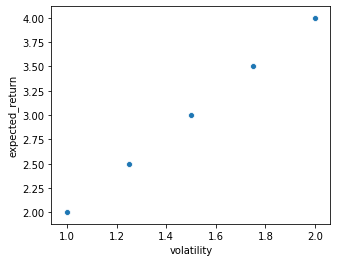

In [10]:
""" cov(x,y) = +2 i.e. move together when one increases, so does the other """

a = np.array([1,2,3]) # daily returns
b = np.array([2,4,6]) # daily returns

# capital allocation
w = [[1, 0], 
     [0.75, 0.25],
     [0.5, 0.5],
     [0.25, 0.75],
     [0, 1]]

# part 1 get the data
returns = np.column_stack([a,b])
print('returns:\n', returns)

# part 2.1 get mean return for each asset
mu_values = returns.mean(axis=0)
print('mu_values: ', mu_values)

# part 2.2 compute asset covariance
cov = np.cov(returns.T) # .T -> each row represents an asset
print('covariance matrix:\n', cov)

erts, epovo, vola = [], [], []
for alloc in w:
    w = np.array(alloc)
    print('\nweights: ', w)
    # part 3.1 compute expected return based on selected allocation (weights)
    expected_return = w @ mu_values
    erts.append(expected_return)
    print('expected_return based on captial allocation w: ', expected_return)

    # part 3.2 compute expected portfolio variance & std based on selected allocation (weights)
    expected_portfolio_variance = w.T @ cov @ w
    epovo.append(expected_portfolio_variance)
    print('expected_portfolio_variance ', expected_portfolio_variance)

    # standard deviation = sqrt(variance)
    volatility = np.sqrt(expected_portfolio_variance) 
    vola.append(volatility)
    print('volatility', volatility)


# now we can plot expected return vs. risk/volatility !!!
df = pd.DataFrame(list(zip(vola, erts)), columns =['volatility', 'expected_return']) 
df 

plt.figure(figsize=(5,4))
plot = sns.scatterplot(x='volatility', y='expected_return', data=df)
